In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from skimage.color import rgb2lab, lab2rgb

In [2]:
pixels = np.array(list(np.ndindex((255, 255, 255))))
lab = rgb2lab(pixels)

In [3]:
df = pd.DataFrame()

df[['rgb_R', 'rgb_G', 'rgb_B']] = pixels
df[['lab_L', 'lab_A', 'lab_B']] = lab

df.sample(5)

,rgb_R,rgb_G,rgb_B,lab_L,lab_A,lab_B
11354841,174,158,201,0.000005,0.000001,-0.000002
16377885,251,222,0,0.000007,-0.000003,0.000010
1009696,15,134,151,0.000004,-0.000003,-0.000002
8919938,137,45,38,0.000002,0.000003,0.000001
13433086,206,148,196,0.000005,0.000003,-0.000002


In [4]:
def dist(original, distorted):
    lab_original = rgb2lab(original/255)
    lab_distorted = rgb2lab(distorted/255)
    
    return np.sum(np.sqrt(
        (lab_original[:, 0] - lab_distorted[:, 0]) ** 2 +
        (lab_original[:, 1] - lab_distorted[:, 1]) ** 2 +
        (lab_original[:, 2] - lab_distorted[:, 2]) ** 2
    ))

# Function to compute percentage distortion
def dist_percent(image, distorted):
    
    distortion = dist(image, distorted)
        
    # Maximum possible Euclidean distance in Lab space
    L_max = 100.0
    a_max = 255.0
    b_max = 255.0
    max_distance_per_pixel = np.sqrt(L_max**2 + a_max**2 + b_max**2)
    
    # Total maximum possible distortion
    max_possible_distortion = max_distance_per_pixel * len(image)
    
    # Calculate percentage distortion
    percentage_distortion = (distortion / max_possible_distortion)
    
    return percentage_distortion

dist_percent(np.random.randint(0,255, size=pixels.shape), np.random.randint(0,255, size=pixels.shape))

0.22334375703731255

In [5]:
def score(new):
    return dist_percent(new.reshape(pixels.shape) , pixels)

In [6]:
rand_pixels = np.random.randint(0,255, size=pixels.shape)
rand_lab = rgb2lab(rand_pixels/255)

In [15]:
pixel_mask = pixels
pixel_mask[:,0]

array([  0,   0,   0, ..., 254, 254, 254])

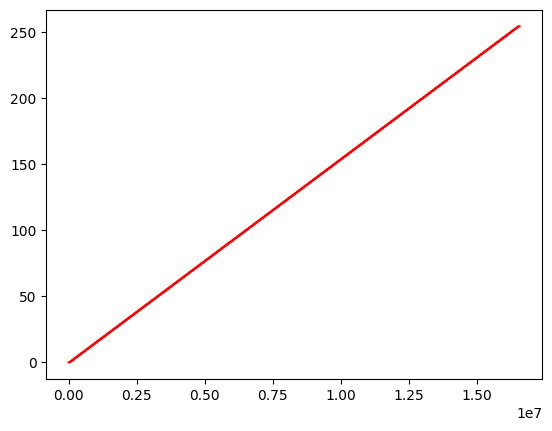

In [17]:
plt.plot(pixel_mask[:,0], color='red')
#plt.plot(pixel_mask[:,1], color='green')
#plt.plot(pixel_mask[:,2], color='blue')

In [9]:
from scipy.optimize import minimize

#result = minimize(score, rand_pixels.ravel(), method='BFGS')
#result.x.reshape(pixels.shape)

In [10]:
from scipy.optimize import differential_evolution

matrix_shape = pixels.shape
bounds = [(0, 4) for _ in range(matrix_shape[0] * matrix_shape[1])]

#ev_result = differential_evolution(score, bounds, maxiter=10)